In [1]:
# Data Processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualisation
import seaborn as sns

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
ratings = pd.read_csv("ratings.csv")
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [3]:
ratings.shape

(25000095, 4)

In [4]:
ratings.head(20)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


In [5]:
print(ratings.index)

RangeIndex(start=0, stop=25000095, step=1)


In [6]:
df = ratings.iloc[24899259:]

In [7]:
df

,userId,movieId,rating,timestamp
24899259,161927,5222,4.0,1028696863
24899260,161927,5225,5.0,1093312818
24899261,161927,5237,3.0,1028694044
24899262,161927,5266,3.0,1028697720
24899263,161927,5267,3.0,1028695929
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 24899259 to 25000094
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
# Numbers of Users
print("The no of Total users",df['userId'].nunique(),'unique users')

# numbers of Movies
print(" The total no of movies",df['movieId'].nunique(),'unique movies')

# numbers of ratings
print("The total no of movies",df['rating'].nunique(),'unique ratings')

# numbers of Unique Ratings
print("The Unique ratings are",sorted(df['rating'].unique()))

The no of Total users 615 unique users
 The total no of movies 11844 unique movies
The total no of movies 10 unique ratings
The Unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [10]:
movies = pd.read_csv("movies.csv")

In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
# merging the rating and the movie dataset
df1 = pd.merge(df,movies, on = 'movieId',how = 'inner')

df1.head()

,userId,movieId,rating,timestamp,title,genres
0,161927,5222,4.0,1028696863,Kissing Jessica Stein (2001),Comedy|Romance
1,161927,5225,5.0,1093312818,And Your Mother Too (Y tu mamá también) (2001),Drama|Romance
2,161927,5237,3.0,1028694044,Taps (1981),Drama
3,161927,5266,3.0,1028697720,Panic Room (2002),Thriller
4,161927,5267,3.0,1028695929,"Rookie, The (2002)",Drama


In [13]:
# aggregate the Movie
agg_ratings = df1.groupby('title').agg(mean_rating=('rating','mean'),number_of_rating = ('rating','count')).reset_index()

# TO KEEP THE MOVIE OVER 100 RATINGS
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_rating']>100]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 74 to 11705
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             130 non-null    object 
 1   mean_rating       130 non-null    float64
 2   number_of_rating  130 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [14]:
# CHECK THE POPULAR MOVIES
agg_ratings_GT100.sort_values(by='number_of_rating',ascending=False).head()

,title,mean_rating,number_of_rating
9092,"Shawshank Redemption, The (1994)",4.506024,332
3749,Forrest Gump (1994),4.121118,322
8212,Pulp Fiction (1994),4.133540,322
9195,"Silence of the Lambs, The (1991)",4.121160,293
6563,"Matrix, The (1999)",4.204861,288


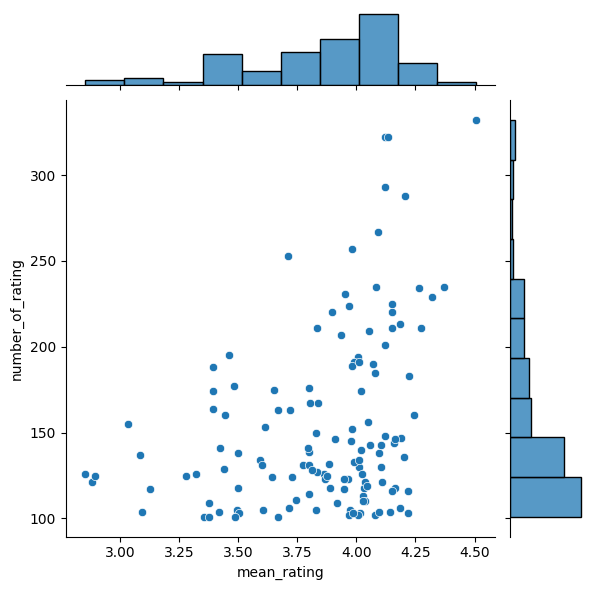

In [15]:
# Visualisation
sns.jointplot(x='mean_rating',y='number_of_rating', data=agg_ratings_GT100)

In [16]:
# merge data
df_GT100 = pd.merge(df1,agg_ratings_GT100[['title']], on='title',how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20046 entries, 0 to 20045
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     20046 non-null  int64  
 1   movieId    20046 non-null  int64  
 2   rating     20046 non-null  float64
 3   timestamp  20046 non-null  int64  
 4   title      20046 non-null  object 
 5   genres     20046 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 939.8+ KB


# Create User-Movie Matrix

In [17]:
# create user-item matrix
matrix = df_GT100.pivot_table(index='userId',columns='title',values='rating')
matrix.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apollo 13 (1995),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
161927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161928,NaN,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.5,...,3.0,NaN,3.0,NaN,3.0,5.0,3.0,3.0,3.0,3.5
161929,NaN,3.5,4.0,4.0,4.0,NaN,4.5,NaN,3.0,NaN,...,2.0,2.5,NaN,2.0,NaN,NaN,NaN,NaN,0.5,4.5
161930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN
161931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,3.5,NaN,NaN,4.0,4.0,NaN,NaN,NaN


# Data Normalisation

In [18]:
# Normalise user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1),axis='rows')
matrix_norm.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apollo 13 (1995),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
161927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161928,NaN,-0.731092,-0.731092,-0.731092,-0.731092,0.268908,0.268908,0.268908,-0.731092,-1.231092,...,-0.731092,NaN,-0.731092,NaN,-0.731092,1.268908,-0.731092,-0.731092,-0.731092,-0.231092
161929,NaN,0.092105,0.592105,0.592105,0.592105,NaN,1.092105,NaN,-0.407895,NaN,...,-1.407895,-0.907895,NaN,-1.407895,NaN,NaN,NaN,NaN,-2.907895,1.092105
161930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
161931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036585,...,NaN,NaN,-0.536585,NaN,NaN,-0.036585,-0.036585,NaN,NaN,NaN


#  identify Similiar Users

In [19]:
# user similarity matrix using Peason correaltion
user_similarity = matrix_norm.T.corr()
user_similarity.head()

userId,161927,161928,161929,161930,161931,161933,161934,161935,161936,161937,...,162532,162533,162534,162535,162536,162537,162538,162539,162540,162541
userId,,,,,,,,,,,,,,,,,,,,,
161927,1.000000,0.534164,NaN,NaN,1.000000,0.004690,NaN,9.707253e-01,NaN,NaN,...,0.125000,0.471728,0.342790,NaN,1.000000,NaN,0.327327,NaN,-0.970725,0.912871
161928,0.534164,1.000000,0.240764,NaN,0.143156,0.077508,-0.023702,2.343500e-01,0.094139,2.629395e-01,...,0.245042,0.136688,0.045419,0.161515,-0.033663,0.000000,0.100435,-0.138409,-0.308607,0.346170
161929,NaN,0.240764,1.000000,NaN,-0.332965,0.361412,0.500106,4.574957e-01,0.199975,4.781583e-01,...,0.071429,0.572907,0.357531,0.818958,0.216541,0.061898,-0.118129,0.060007,-0.327327,0.549578
161930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161931,1.000000,0.143156,-0.332965,NaN,1.000000,-0.131281,-0.409032,3.074828e-17,0.031220,-2.319006e-17,...,-0.029442,0.132907,0.153735,NaN,0.258887,0.091287,-0.237663,-0.097849,NaN,0.095851


In [20]:
#user similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.15813117,  0.00598613, ...,  0.        ,
        -0.3593898 ,  0.09066798],
       [ 0.15813117,  1.        ,  0.15143874, ..., -0.06162373,
        -0.08835645,  0.1844619 ],
       [ 0.00598613,  0.15143874,  1.        , ...,  0.01485521,
         0.00439029,  0.3496622 ],
       ...,
       [ 0.        , -0.06162373,  0.01485521, ...,  1.        ,
         0.06000686,  0.00189459],
       [-0.3593898 , -0.08835645,  0.00439029, ...,  0.06000686,
         1.        ,  0.02498748],
       [ 0.09066798,  0.1844619 ,  0.3496622 , ...,  0.00189459,
         0.02498748,  1.        ]])

In [22]:
# pick a user
picked_userid = 161933

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

user_similarity.head()

userId,161927,161928,161929,161930,161931,161933,161934,161935,161936,161937,...,162532,162533,162534,162535,162536,162537,162538,162539,162540,162541
userId,,,,,,,,,,,,,,,,,,,,,
161927,1.000000,0.534164,NaN,NaN,1.000000,0.004690,NaN,9.707253e-01,NaN,NaN,...,0.125000,0.471728,0.342790,NaN,1.000000,NaN,0.327327,NaN,-0.970725,0.912871
161928,0.534164,1.000000,0.240764,NaN,0.143156,0.077508,-0.023702,2.343500e-01,0.094139,2.629395e-01,...,0.245042,0.136688,0.045419,0.161515,-0.033663,0.000000,0.100435,-0.138409,-0.308607,0.346170
161929,NaN,0.240764,1.000000,NaN,-0.332965,0.361412,0.500106,4.574957e-01,0.199975,4.781583e-01,...,0.071429,0.572907,0.357531,0.818958,0.216541,0.061898,-0.118129,0.060007,-0.327327,0.549578
161930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161931,1.000000,0.143156,-0.332965,NaN,1.000000,-0.131281,-0.409032,3.074828e-17,0.031220,-2.319006e-17,...,-0.029442,0.132907,0.153735,NaN,0.258887,0.091287,-0.237663,-0.097849,NaN,0.095851


In [23]:
# number of similar Users
n =10

# user similarity threashold
user_similarity_threashold = 0.3

# get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threashold][picked_userid]

# print out top n similiar users
print(f'the similar users for user{picked_userid}are', similar_users)

the similar users for user161933are userId
161929    0.361412
161934    0.441126
161937    0.647608
161949    0.659912
161950    0.336505
            ...   
162531    0.629844
162532    0.404026
162535    0.503151
162537    0.800702
162540    0.454699
Name: 161933, Length: 153, dtype: float64


# Narrow Down Item Pool 

In [24]:
# Movies that the target users has watched
picked_userid_watched = matrix_norm[matrix_norm.index==picked_userid].dropna(axis=1,how='all')
picked_userid_watched

title,Ace Ventura: Pet Detective (1994),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apollo 13 (1995),Avatar (2009),Back to the Future (1985),...,Trainspotting (1996),True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
161933,0.333333,-0.166667,-0.166667,0.333333,0.833333,0.833333,-1.166667,-1.166667,0.833333,-1.166667,...,0.833333,-1.666667,-0.666667,0.833333,-0.666667,-0.166667,0.833333,-0.166667,-0.666667,-0.666667


In [25]:
# movies that the similar users watched . Remove movie that none of the similar users have watched
similar_user_movie = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movie

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apollo 13 (1995),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALL·E (2008),Waterworld (1995),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
161929,NaN,0.092105,0.592105,0.592105,0.592105,NaN,1.092105,NaN,-0.407895,NaN,...,-1.407895,-0.907895,NaN,-1.407895,NaN,NaN,NaN,NaN,-2.907895,1.092105
161934,-0.918367,NaN,0.081633,NaN,NaN,NaN,NaN,NaN,NaN,0.081633,...,0.081633,NaN,NaN,0.081633,NaN,NaN,NaN,NaN,-1.918367,NaN
161937,NaN,NaN,-0.535714,NaN,NaN,NaN,NaN,NaN,NaN,0.464286,...,NaN,NaN,NaN,NaN,NaN,-0.535714,NaN,NaN,NaN,NaN
161949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.666667,-0.333333,NaN,NaN,NaN,NaN,NaN,NaN
161950,NaN,0.219512,-1.780488,-0.280488,NaN,NaN,NaN,0.219512,0.219512,-0.280488,...,NaN,0.219512,NaN,NaN,NaN,NaN,0.219512,-1.780488,-0.280488,0.719512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555556,...,NaN,NaN,NaN,NaN,NaN,-0.444444,NaN,NaN,NaN,NaN
162532,NaN,NaN,NaN,NaN,NaN,0.410256,NaN,NaN,NaN,NaN,...,NaN,0.410256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Remove the watched movie from the movie list
similar_user_movie.drop(picked_userid_watched.columns,axis=1,inplace=True,errors='ignore')

similar_user_movie

title,2001: A Space Odyssey (1968),Aladdin (1992),Babe (1995),Batman (1989),Batman Forever (1995),Beauty and the Beast (1991),Being John Malkovich (1999),Casablanca (1942),"Departed, The (2006)","Fifth Element, The (1997)",...,Outbreak (1995),"Prestige, The (2006)",Pretty Woman (1990),"Princess Bride, The (1987)","Rock, The (1996)",Snatch (2000),Stargate (1994),There's Something About Mary (1998),Toy Story (1995),Twister (1996)
userId,,,,,,,,,,,,,,,,,,,,,
161929,NaN,0.592105,NaN,0.592105,-1.407895,1.092105,-0.907895,NaN,NaN,-0.407895,...,-0.907895,NaN,1.092105,1.592105,-0.907895,NaN,0.092105,0.592105,0.592105,-1.407895
161934,-0.918367,0.081633,-0.918367,0.081633,0.081633,0.081633,NaN,1.081633,NaN,0.081633,...,NaN,NaN,NaN,NaN,0.081633,NaN,-0.918367,NaN,1.081633,0.081633
161937,NaN,-0.535714,NaN,-0.535714,-0.535714,0.464286,NaN,NaN,NaN,NaN,...,-0.535714,NaN,-0.535714,NaN,NaN,NaN,NaN,NaN,-0.535714,NaN
161949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.333333,NaN,NaN,NaN,0.666667,-0.333333
161950,NaN,-1.780488,-0.780488,NaN,NaN,-1.780488,NaN,NaN,0.719512,0.719512,...,NaN,NaN,NaN,-0.280488,0.219512,1.219512,NaN,-0.280488,-1.780488,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.410256,NaN,-0.089744,NaN,NaN,NaN,NaN
162535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.444444,NaN,NaN,NaN,-0.555556,NaN,NaN


# Recommended Items

In [27]:
# a dictionary to store the item score
item_score = {}

#loop through items
for i in similar_user_movie.columns:
    # Get the rating for movie i
    movie_rating = similar_user_movie[i]
    # creating a variable to store the score
    total = 0
    # Create a variable to store the numbers of scores
    count = 0
    # loop through similar users
    for u in similar_users.index:
        # if the movie has rating
        if pd.isna(movie_rating[u]) == False:
            # Score is the sum of user similaritity score multiply by the movie rating
            score = similar_users[u] * movie_rating[u]
            # Add the score of the total score for the movies so far
            total += score
            # add 1 to the count
            count += 1
            
    # Get the Average score for the item
    item_score[i] = total/count
                   
# Convert Dictionary to pandas Dataframe
item_score = pd.DataFrame(item_score.items(),columns=['movies','movie_score'])
     
# Sort the Movies by the score
ranked_item_score = item_score.sort_values(by='movie_score',ascending=False)

# Select top n movies
m = 10
ranked_item_score.head(m)

,movies,movie_score
7,Casablanca (1942),0.220647
26,Snatch (2000),0.174793
24,"Princess Bride, The (1987)",0.110453
19,Monty Python and the Holy Grail (1975),0.105139
6,Being John Malkovich (1999),0.057716
14,L.A. Confidential (1997),0.053689
15,"Lion King, The (1994)",0.038193
8,"Departed, The (2006)",0.033456
29,Toy Story (1995),0.025072
12,Ghostbusters (a.k.a. Ghost Busters) (1984),-0.012657


# Predict Scores (Optional)

In [28]:
# Average Rating for the picked User
avg_rating = matrix[matrix.index==picked_userid].T.mean()[picked_userid]

# Print the average movie rating for the user 1
print(f'The average movie Rating for the User {picked_userid} is {avg_rating:.2f}')

The average movie Rating for the User 161933 is 4.17


In [29]:
# Calculate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating

ranked_item_score.head(m)

,movies,movie_score,predicted_rating
7,Casablanca (1942),0.220647,4.387314
26,Snatch (2000),0.174793,4.341460
24,"Princess Bride, The (1987)",0.110453,4.277119
19,Monty Python and the Holy Grail (1975),0.105139,4.271806
6,Being John Malkovich (1999),0.057716,4.224383
14,L.A. Confidential (1997),0.053689,4.220356
15,"Lion King, The (1994)",0.038193,4.204860
8,"Departed, The (2006)",0.033456,4.200123
29,Toy Story (1995),0.025072,4.191738
12,Ghostbusters (a.k.a. Ghost Busters) (1984),-0.012657,4.154009
